## Static Homogeneneous Market
This experiment is mostly conducted for validation and reference, for this reason the environment is simpler than in the subsequent experiments.
In this notebook I run multiple market sessions populated symetrically with PRDE traders (30B/30S, just like https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4153519, the original study on PRDE performance). The sessions implement a periodic order schedule ("timemode"), fixed spacing in the price distribution ("stepmode") for reduced randomness and increased reproducibility. Each market session lasts 5 min, but could be changed to last for example the same time as a trading day at the London Stock Exchange (8h 30min). 
The PRDE traders have varying k and F parameter values. Each combination is tested 10 times (the random assignment of orders to traders will have had some effect). The k ranges from 4 to 1000 (https://link.springer.com/chapter/10.1007/978-3-030-37838-7_3 found the best perfomance at k = 400, https://www.researchgate.net/post/What_is_the_optimal_recommended_population_size_for_differential_evolution2) and the F lies between 0 and 2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd

import BSE
import helpers

In [2]:
def static_homogeneous_session(k, F, trial_id_str, csv_str):
    # First, configure the trader specifications
    sellers_spec = [('PRDE', 30, {'k': k, 's_min': -1.0, 's_max': +1.0, 'F': F})]
    buyers_spec = sellers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

    # Next, confiure the supply and demand (and plot it)
    sup_range = (100, 200)
    dem_range = sup_range

    # Next, configure order schedules

    start_time = 0
    end_time = 60 * 5
    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]

    order_interval = 5
    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}

    trial_id = trial_id_str
    tdump = open(csv_str,'w')
    dump_all = False
    verbose = False

    # Now, run the market session
    BSE.market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)

    tdump.close()

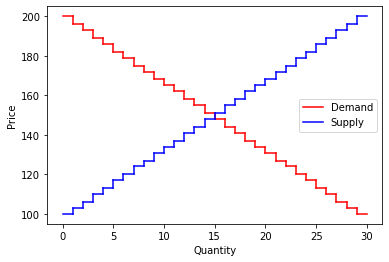

In [2]:
helpers.plot_sup_dem(30, [(100, 200)], 30,[(100, 200)], 'fixed')

In [19]:
#powers of 2 from 4 to 1024 or however much it would be
k_range = np.logspace(1, 10, num=10, base=2)
k_range = k_range[1:10]
k_range = k_range.astype(int)
#0 to 2 intervals of 0.2
F_range = np.linspace(0.0, 2.0, 10)

[0.]


In [20]:
def loop_kF(n, m, trial_id_str, csv_str):
    i = 4
    for i in n:
        for j in m:
            static_homogeneous_session(i, j, trial_id_str + '_' + str(i) + '_' + str(j)[0:3], csv_str + '_' + str(i) + '_' + str(j)[0:3] + '.csv')
        

   

In [21]:
random.seed(2)
i = 0
while i < 10:
    loop_kF(k_range, F_range, 'shom_' + str(i), 'shom_avg_bal_' + str(i))
    i = i+1

